# CNN With Mnist Dataset

In [ ]:
# import warnings
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import load_model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model, Sequential
from keras import backend as K
from keras.utils import np_utils

## Loading and Previewing Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train data dimension: {}'.format(x_train.shape))
print('Test data dimension: {}'.format(x_test.shape))
print('Test label dimension: {}'.format(y_test.shape))

print('Max Training data: {}'.format(np.max(x_train)))
print('Min Training data: {}'.format(np.min(x_train)))

print('Max Test data: {}'.format(np.max(x_test)))
print('Min Test data: {}'.format(np.min(x_test)))

11493376/11490434 [==============================] - 1s 0us/step
Train data dimension: (60000, 28, 28)
Test data dimension: (10000, 28, 28)
Test label dimension: (10000,)
Max Training data: 255
Min Training data: 0
Max Test data: 255
Min Test data: 0


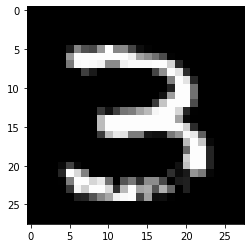

label: 3


In [3]:
rand_num = np.random.randint(60000)
# plot using plt.imshow() & plt.show()
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
# print its label
print('label:', y_train[rand_num])

## Data Preprocessing

In [4]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(x_train[0].shape)  
print(x_train[1].shape)

(28, 28, 1)
(28, 28, 1)


In [ ]:
# normalize pixel values
x_train = x_train.astype('float32') / np.max(x_train)
x_test = x_test.astype('float32') / np.max(x_train)

In [ ]:
# one hot encode labels
y_train_one_hot = np_utils.to_categorical(y_train, 10)
y_test_one_hot = np_utils.to_categorical(y_test, 10)

## Define Model

In [15]:
#model without batch normalization and dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

In [20]:
#model with batch normalization and dropout

model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, kernel_size=(3,3),
                activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D())
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
            metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)       

## Training and Evaluating the Model

In [17]:
model.fit(x_train, y_train_one_hot,  
          batch_size = 128,
          epochs = 3,
          verbose = 1,
          validation_data=(x_test, y_test_one_hot))
score = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Loss: ', score[0])
print('Accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.1861 - acc: 0.9421 - val_loss: 0.2774 - val_acc: 0.9825
Epoch 2/3
60000/60000 [==============================] - 3s 56us/step - loss: 0.0463 - acc: 0.9852 - val_loss: 0.2385 - val_acc: 0.9851
Epoch 3/3
60000/60000 [==============================] - 3s 56us/step - loss: 0.0292 - acc: 0.9911 - val_loss: 0.1849 - val_acc: 0.9884
Loss:  0.18491602670849386
Accuracy:  0.9884


In [21]:
model_2.fit(x_train, y_train_one_hot,  
          batch_size = 128,
          epochs = 3,
          verbose = 1,
          validation_data=(x_test, y_test_one_hot))
score = model_2.evaluate(x_test, y_test_one_hot, verbose=0)
print('Loss: ', score[0])
print('Accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 93us/step - loss: 0.3510 - acc: 0.9330 - val_loss: 0.5445 - val_acc: 0.9659
Epoch 2/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.0583 - acc: 0.9828 - val_loss: 0.4782 - val_acc: 0.9700
Epoch 3/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.0350 - acc: 0.9896 - val_loss: 0.6166 - val_acc: 0.9613
Loss:  0.6165718761444102
Accuracy:  0.9613


The model's accuracy decreased and the loss increased when I added batch normalization and dropout to the model.